In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_column", None)
pd.set_option("display.max_row", None)

In [3]:
peripartum_df = pd.read_csv("../Dataset/peripartum.csv")

In [4]:
peripartum_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
peripartum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
peripartum_df.shape

(1014, 7)

In [7]:
peripartum_df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [8]:
peripartum_df['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

<AxesSubplot:ylabel='RiskLevel'>

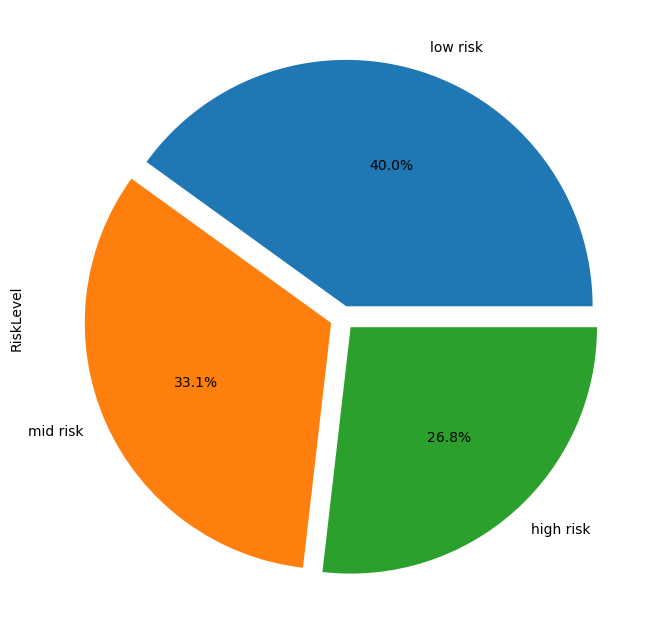

In [9]:
peripartum_df['RiskLevel'].value_counts().plot.pie(explode = [0.05,0.05,0.05], autopct = '%1.1f%%', shadow = False, figsize = (10,8))

Text(0.5, 1.0, 'BodyTemp -- RiskLevel')

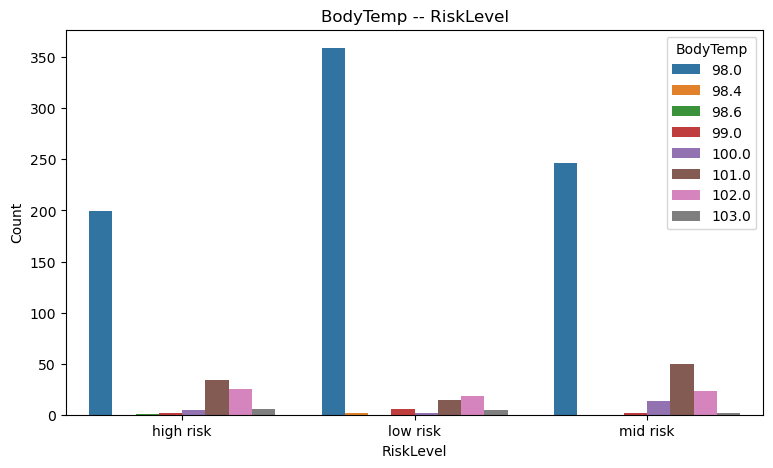

In [6]:
df_BodyTemp = peripartum_df.groupby(["RiskLevel","BodyTemp"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "RiskLevel",y="Count", hue = "BodyTemp",data = df_BodyTemp)
plt.title("BodyTemp -- RiskLevel")

Text(0.5, 1.0, 'HeartRate -- RiskLevel')

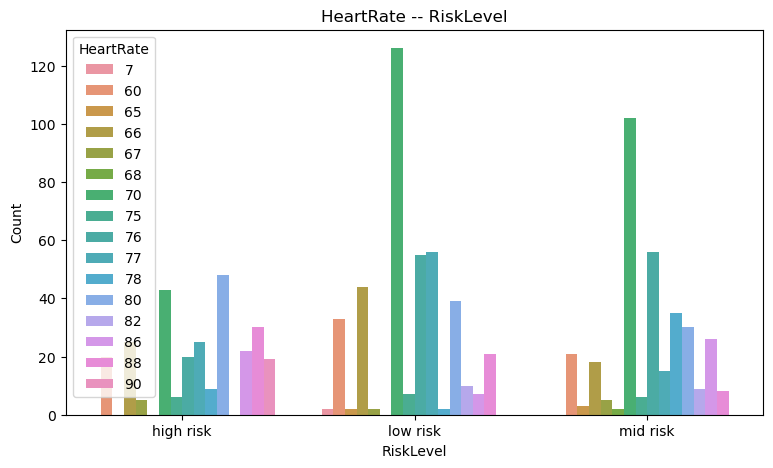

In [13]:
df_BodyTemp = peripartum_df.groupby(["RiskLevel","HeartRate"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "RiskLevel",y="Count", hue = "HeartRate", data = df_BodyTemp)
plt.title("HeartRate -- RiskLevel")

In [10]:
peripartum_df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

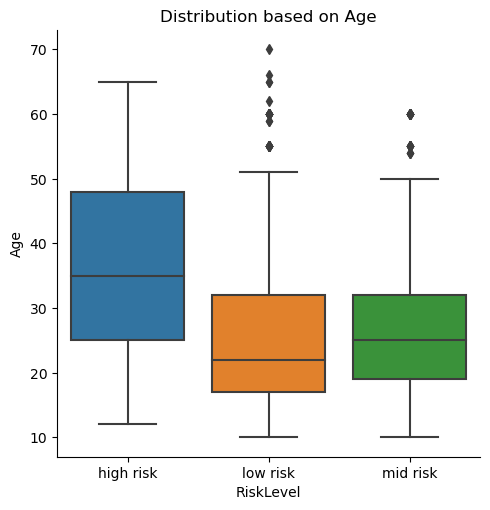

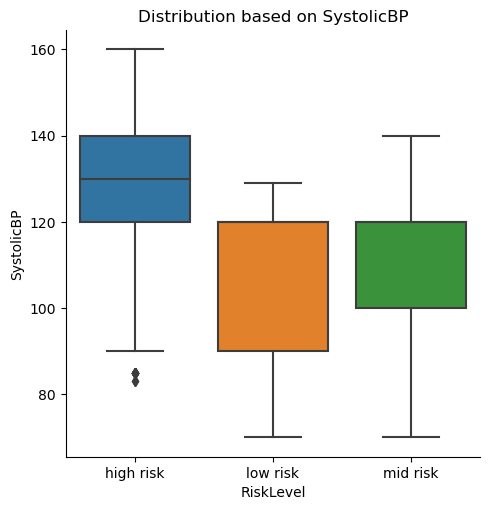

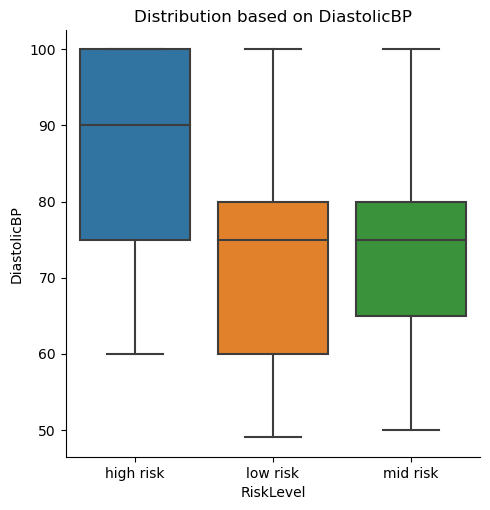

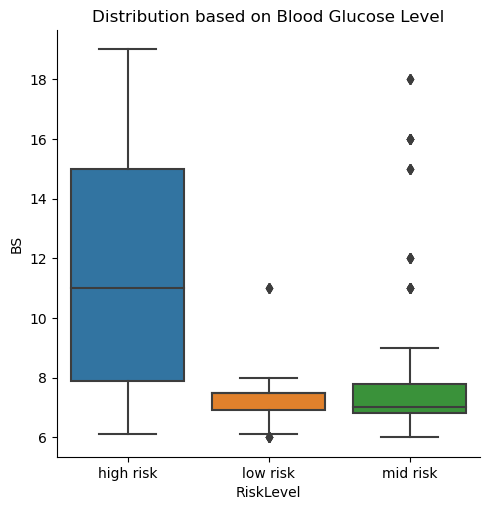

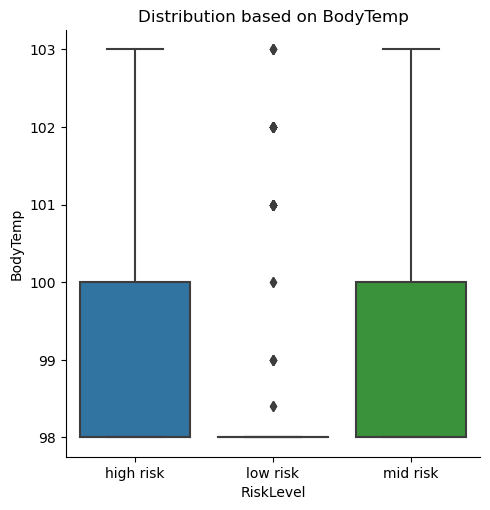

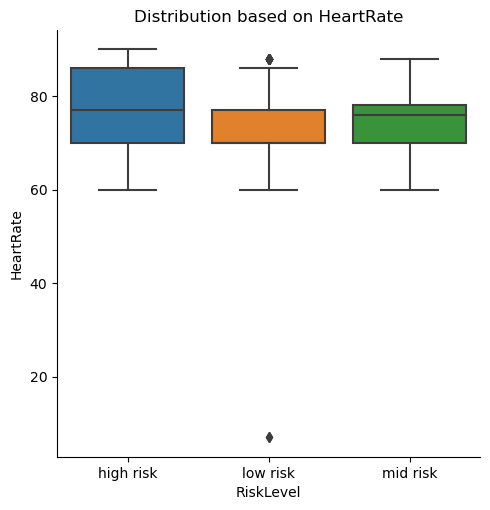

In [16]:
sns.catplot(x="RiskLevel", y="Age", data=peripartum_df, kind="box").set(title="Distribution based on Age")
sns.catplot(x="RiskLevel", y="SystolicBP", data=peripartum_df, kind="box").set(title="Distribution based on SystolicBP")
sns.catplot(x="RiskLevel", y="DiastolicBP", data=peripartum_df, kind="box").set(title="Distribution based on DiastolicBP")
sns.catplot(x="RiskLevel", y="BS", data=peripartum_df, kind="box").set(title="Distribution based on Blood Glucose Level")
sns.catplot(x="RiskLevel", y="BodyTemp", data=peripartum_df, kind="box").set(title="Distribution based on BodyTemp")
sns.catplot(x="RiskLevel", y="HeartRate", data=peripartum_df, kind="box").set(title="Distribution based on HeartRate")

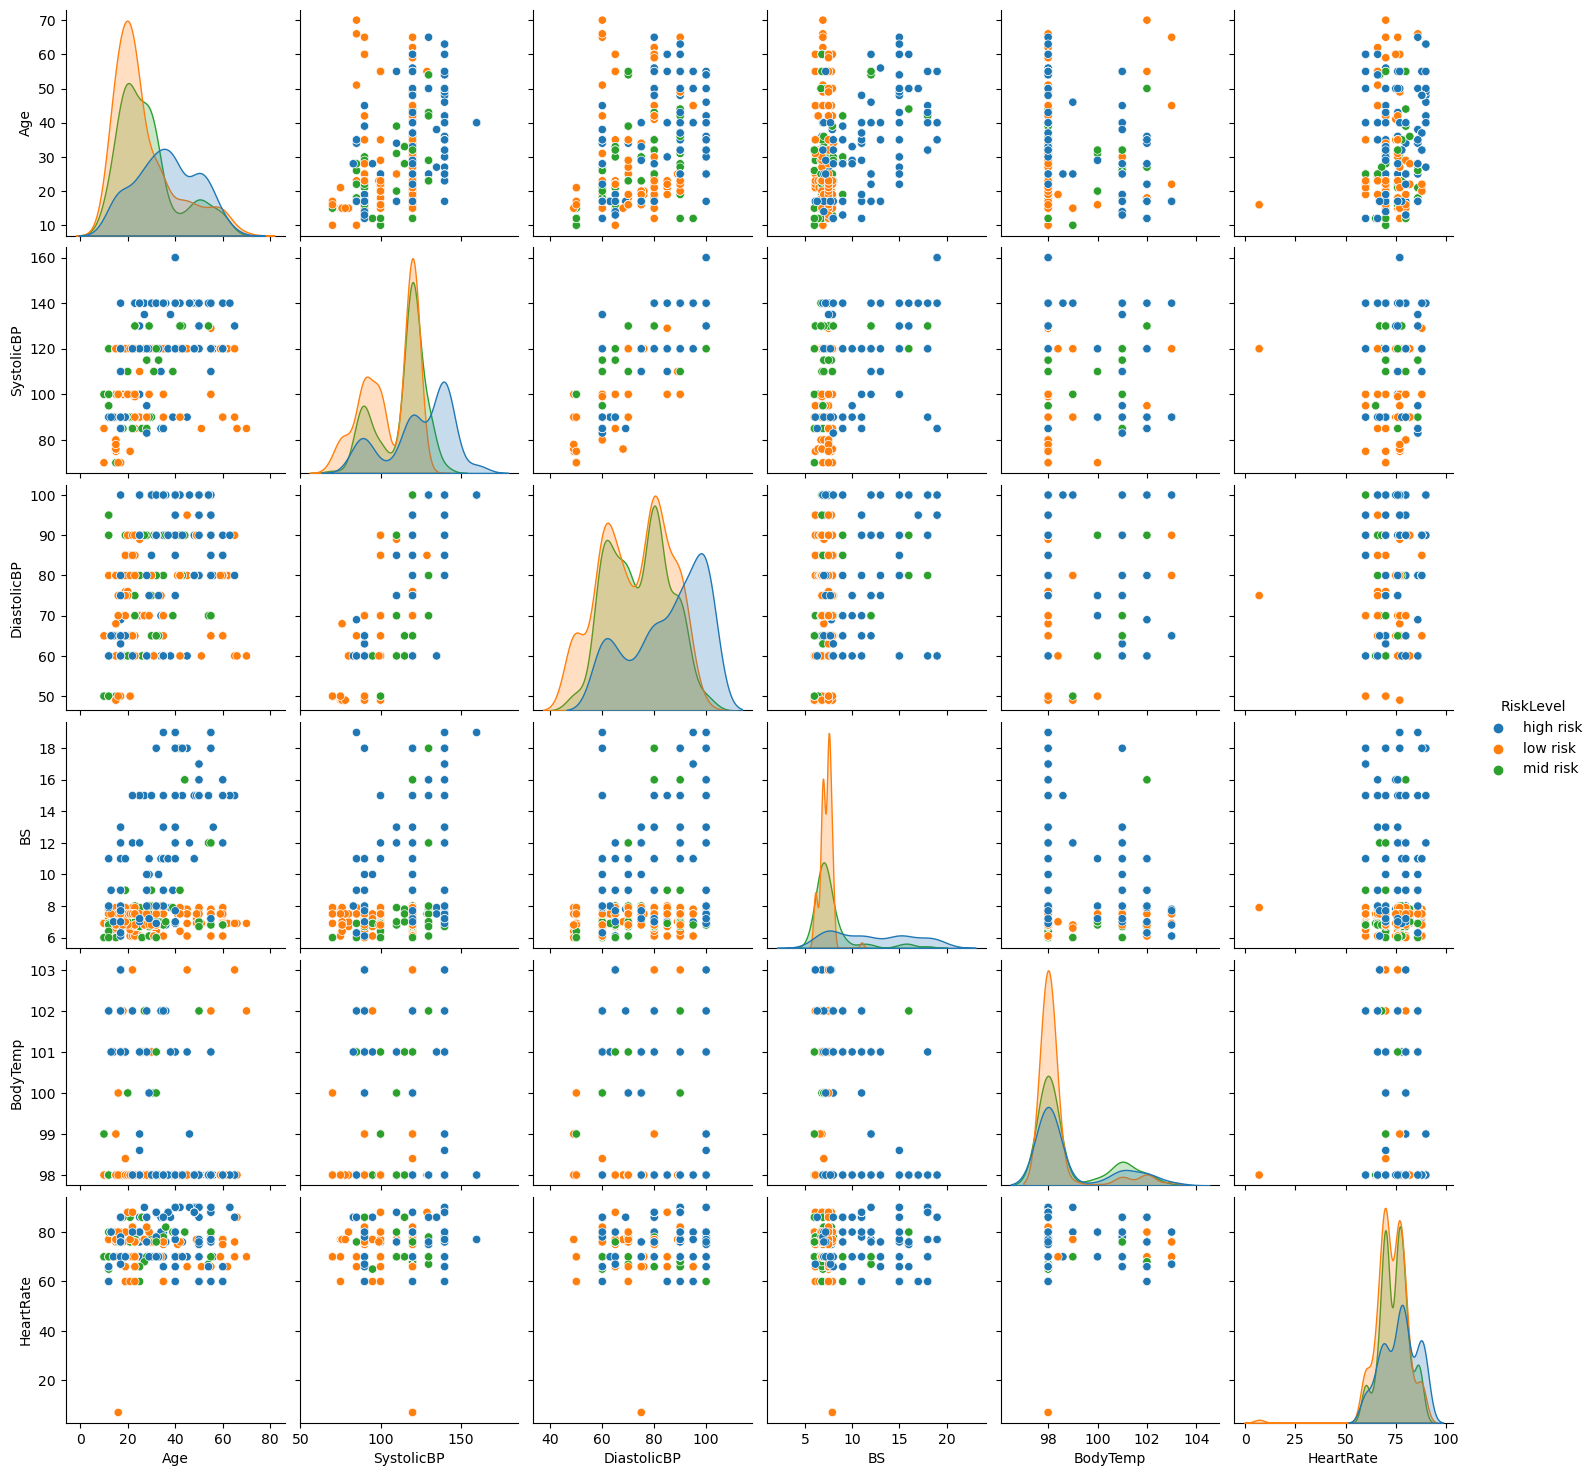

In [13]:
sns.pairplot(peripartum_df, hue="RiskLevel")

<AxesSubplot:>

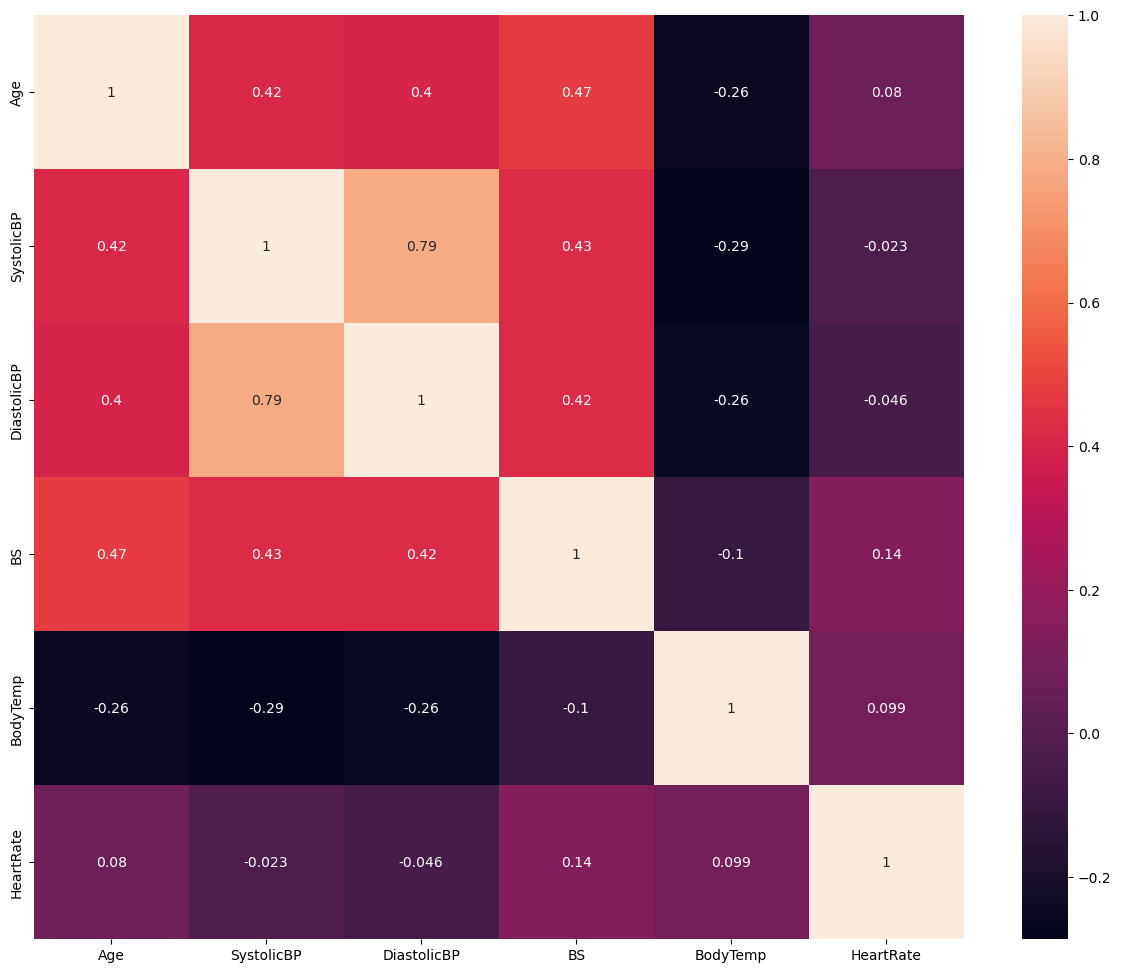

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(peripartum_df.corr(), annot=True)